In [3]:
import os
os.environ['PATH']+=':/usr/local/cuda/bin/' # cuda must be in path
os.environ['CUDA_PATH']='/usr/local/cuda'

import idi.simulation as sim
import numpy as np
from numpy import pi
!hostname
import matplotlib.pyplot as plt
%matplotlib inline

psanagpu109


In [4]:
!where nvcc

/usr/local/cuda/bin/nvcc
/usr/local/cuda/bin/nvcc
/usr/local/cuda/bin//nvcc


**Settings**

In [94]:
Natoms = int(2e5)
Ndet = 256
detz = 5  # in cm
pixelsize = 25 # in um
Nimg = 1
E = 6400  # in ev
rotangles = np.array([0,0,0]) / 180 * pi
cuda = True
r = 5 #nm

**Simulation**

In [95]:
print("preparing")
_detz = detz * 1e4 # in um
k = 2 * pi / (1.24 / E)  # in 1/um
N = Natoms
_r = r * 1e-3 # in um
simobject = sim.simobj.sphere(E,N,_r)
simobject.rndPhase=True
simobject.rndPos=True
c=0.3 #um/fs
tau=.1 #fs

preparing


In [ ]:
_detz

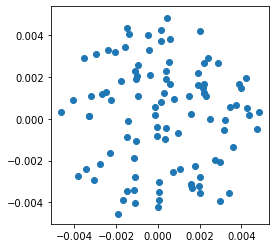

In [12]:
plt.scatter(*simobject.get()[:,:2].T)
plt.xlim(-0.005,0.005)
plt.ylim(-0.005,0.005)
plt.axis('square');

In [5]:
def get_time(self):
    times=np.random.randn(self.N)
    return self.get(),times
import types
simobject.get_times= types.MethodType( get_time, simobject )




0.9999775510133265


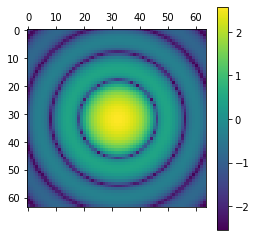

CPU times: user 33.9 s, sys: 44.3 s, total: 1min 18s
Wall time: 35.6 s


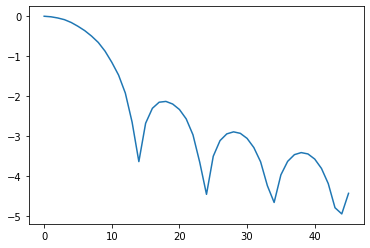

In [129]:
%%time
#np.random.seed(0)
t=sum(sim.cutime.simulate(simobject,Ndet,pixelsize,_detz,k,c,10,100) for i in range(20))
from idi.util import radial_profile
rad=radial_profile(t)
rad=rad/rad.max()
plt.matshow(np.log10(t))
plt.colorbar()
v=(rad.max()-rad.min())/(rad.max()+rad.min())
print(v)
plt.show()
plt.plot(np.log10(rad))

In [96]:
%%time
import idi.util as util
from tqdm import tqdm

#np.random.seed(0)
a1=[util.rebin(sim.cutime.simulate(simobject,Ndet,pixelsize,_detz,k,c,.1,1),2) for i in tqdm(range(50))]
#a3=[util.rebin(sim.cutime.simulate(simobject,Ndet,pixelsize,_detz,k,c,.1,3),2) for i in tqdm(range(50))]
a10=[util.rebin(sim.cutime.simulate(simobject,Ndet,pixelsize,_detz,k,c,.1,10),2) for i in tqdm(range(50))]
#a30=[util.rebin(sim.cutime.simulate(simobject,Ndet,pixelsize,_detz,k,c,.1,30),2) for i in tqdm(range(50))]
a100=[util.rebin(sim.cutime.simulate(simobject,Ndet,pixelsize,_detz,k,c,.1,100),2) for i in tqdm(range(50))]

b1=[util.rebin(sim.cutime.simulate(simobject,Ndet,pixelsize,_detz,k,c,1,1),2) for i in tqdm(range(50))]
b3=[util.rebin(sim.cutime.simulate(simobject,Ndet,pixelsize,_detz,k,c,1,3),2) for i in tqdm(range(50))]
b10=[util.rebin(sim.cutime.simulate(simobject,Ndet,pixelsize,_detz,k,c,1,10),2) for i in tqdm(range(50))]
b30=[util.rebin(sim.cutime.simulate(simobject,Ndet,pixelsize,_detz,k,c,1,30),2) for i in tqdm(range(50))]
b100=[util.rebin(sim.cutime.simulate(simobject,Ndet,pixelsize,_detz,k,c,1,100),2) for i in tqdm(range(50))]


c1=[util.rebin(sim.cutime.simulate(simobject,Ndet,pixelsize,_detz,k,c,10,1),2) for i in tqdm(range(50))]
#c3=[util.rebin(sim.cutime.simulate(simobject,Ndet,pixelsize,_detz,k,c,10,3),2) for i in tqdm(range(50))]
c10=[util.rebin(sim.cutime.simulate(simobject,Ndet,pixelsize,_detz,k,c,10,10),2) for i in tqdm(range(50))]
#c30=[util.rebin(sim.cutime.simulate(simobject,Ndet,pixelsize,_detz,k,c,10,30),2) for i in tqdm(range(50))]
c100=[util.rebin(sim.cutime.simulate(simobject,Ndet,pixelsize,_detz,k,c,10,100),2) for i in tqdm(range(50))]

# from idi.util import radial_profile
# rad=radial_profile(t)
# rad=rad/rad.max()
# plt.matshow(np.log10(t))
# plt.colorbar()
# v=(t.max()-t.min())/(t.max()+t.min())
# print(v,np.std(t))
# plt.show()
# #plt.plot(np.log10(rad))

100%|██████████| 50/50 [40:48<00:00, 48.98s/it]

CPU times: user 4h 13min 25s, sys: 3h 41min 38s, total: 7h 55min 3s
Wall time: 7h 29min 4s


In [ ]:
a3=[util.rebin(sim.cutime.simulate(simobject,Ndet,pixelsize,_detz,k,c,.1,3),2) for i in tqdm(range(50))]
a30=[util.rebin(sim.cutime.simulate(simobject,Ndet,pixelsize,_detz,k,c,.1,30),2) for i in tqdm(range(50))]
c3=[util.rebin(sim.cutime.simulate(simobject,Ndet,pixelsize,_detz,k,c,10,3),2) for i in tqdm(range(50))]
c30=[util.rebin(sim.cutime.simulate(simobject,Ndet,pixelsize,_detz,k,c,10,30),2) for i in tqdm(range(50))]

a0=[util.rebin(sim.cutime.simulate(simobject,Ndet,pixelsize,_detz,k,c,.1,.1),2) for i in tqdm(range(50))]

b0=[util.rebin(sim.cutime.simulate(simobject,Ndet,pixelsize,_detz,k,c,1,.1),2) for i in tqdm(range(50))]

c0=[util.rebin(sim.cutime.simulate(simobject,Ndet,pixelsize,_detz,k,c,10,.1),2) for i in tqdm(range(50))]


 68%|██████▊   | 34/50 [27:52<13:06, 49.18s/it]

In [86]:
import idi.reconstruction as recon

In [132]:
allimg=[a1,a10,a100,b1,b3,b10,b30,b100,c1,c10,c100]
taus=[.1,.1,.1,1,1,1,1,1,10,10,10]
widths=[1,10,100,1,3,10,30,100,1,10,100]


In [98]:
allimg[0][0].shape

(128, 128)

In [120]:
with recon.cucorrad.corrfunction(allimg[0][0].shape, _detz/pixelsize, 128) as f:
    results=[]       
    for imgs in allimg:
        norm1=np.mean(imgs,axis=0)
        norm2=f(np.ones_like(imgs[0]))*len(imgs)
        results.append(sum((f(i/norm1) for i in imgs) )/norm2)

0.1 1 0.031585207425169994
0.1 10 0.003123212615133978
0.1 100 0.0003305382807664922
1 1 0.1916635240099609
1 3 0.0882939850124237
1 10 0.03371974482468343
1 30 0.010627456268124875
1 100 0.0033535861466237084
10 1 0.30702574510801367
10 10 0.19124907369348532
10 100 0.031069490825433765


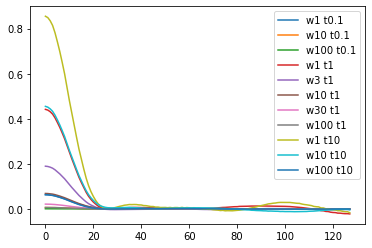

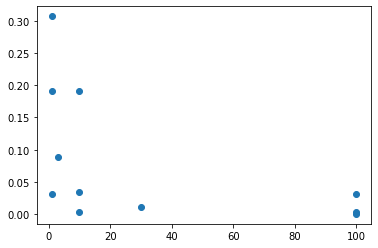

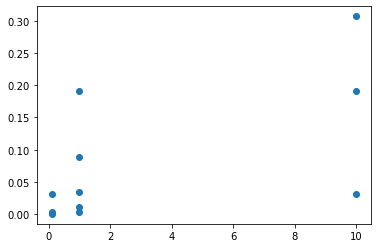

In [133]:
vs=[]
for r,t,w in zip(results,taus,widths):
    plt.plot(r-1+1e-4,label=f'w{w} t{t}')
    v=(r.max()-r.min())/(r.max()+r.min())
    vs.append(v)
    print(t,w,v)
plt.legend()
plt.show()


plt.scatter(widths,vs)
plt.show()
plt.scatter(taus,vs)
plt.show()

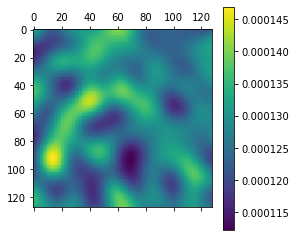

In [108]:
norm=np.mean(allimg,axis=(0,1))
plt.matshow(norm)
plt.colorbar()